In [1]:
from fibertree import Codec
from fibertree import Tensor

import copy

# Run boilerplate code to set up environment

# Uncomment the first line and comment out the second to show movie animations

#%run ../prelude.py
%run ../prelude.py --no-show-animations

interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

# Test driver to encode a tensor using the codec

In [2]:
# given a tensor and descriptor, write it
def try_format(tensor, descriptor):
    codec = Codec(tuple(descriptor))

    rank_names = tensor.getRankIds()

    output = Codec.get_output_dict(rank_names)
    
    # depth_start, root, rank ids, output dict
    codec.encode(-1, tensor.getRoot(), rank_names, output)

    Codec.write_yaml(tensor, descriptor, output)

In [3]:
def try_all_formats(tensor, possible_formats, descriptor):
    # once we have built a full descriptor, try it
    if len(descriptor) == len(tensor.getRankIds()):
        try_format(tensor, descriptor)

    else:
        # add a format to the descriptor and recurse
        for fmt in possible_formats:
            temp = copy.deepcopy(descriptor)
            temp.append(fmt)
            try_all_formats(tensor, possible_formats, temp)

# UU example

In [ ]:
descriptor = ["U", "U"]
test_data = [[0, 1], [2, 3]]
test_mtx = Tensor.fromUncompressed(["M", "K"], test_data)

try_format(test_mtx, descriptor)

# UC example

In [ ]:
descriptor = ["U", "C"]
test_data = [[0, 1], [2, 3]]
test_mtx = Tensor.fromUncompressed(["M", "K"], test_data)

try_format(test_mtx, descriptor)

# CU example 

In [ ]:
# example from slides
descriptor = ["U", "C"]
test_data = [['a', 'b', 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], ['c', 0, 'd', 0]]

test_mtx = Tensor.fromUncompressed(["M", "K"], test_data)

displayTensor(test_mtx)
try_format(test_mtx, descriptor)

# CC example

In [ ]:
descriptor = ["C", "C"]
test_data = [[0, 0], [0, 3]]
test_mtx = Tensor.fromUncompressed(["M", "K"], test_data)

try_format(test_mtx, descriptor)

# try all bitvector combinations with U

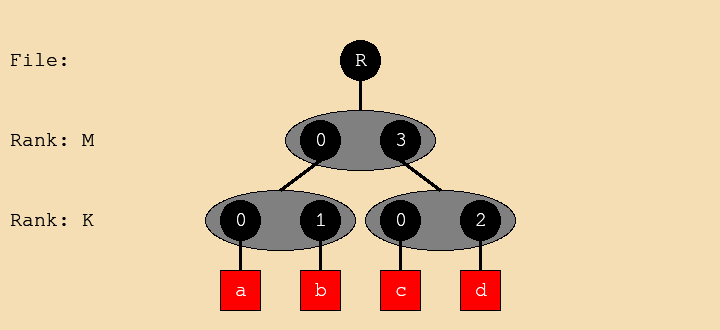

tensor:
  name: tensor-a
  rank_ids: [M, K]
  shapes: [4, 4]
  formats: [B, B]
  scratchpads:
    rank_1:
      coords: [1, 0, 0, 1]
    rank_2:
      coords: [1, 1, 0, 0, 1, 0, 1, 0]
      payloads: [a, b, c, d]

tensor:
  name: tensor-a
  rank_ids: [M, K]
  shapes: [4, 4]
  formats: [B, C]
  scratchpads:
    rank_1:
      coords: [1, 0, 0, 1]
      payloads: [0, 2, 4]
    rank_2:
      coords: [0, 1, 0, 2]
      payloads: [a, b, c, d]

tensor:
  name: tensor-a
  rank_ids: [M, K]
  shapes: [4, 4]
  formats: [C, B]
  scratchpads:
    rank_0:
      payloads: [2]
    rank_1:
      coords: [0, 3]
    rank_2:
      coords: [1, 1, 0, 0, 1, 0, 1, 0]
      payloads: [a, b, c, d]

tensor:
  name: tensor-a
  rank_ids: [M, K]
  shapes: [4, 4]
  formats: [C, C]
  scratchpads:
    rank_0:
      payloads: [2]
    rank_1:
      coords: [0, 3]
      payloads: [0, 2, 4]
    rank_2:
      coords: [0, 1, 0, 2]
      payloads: [a, b, c, d]



In [4]:
""" Test 2D tensor """
descriptor = ["B", "C"]
ranks = ["M", "K"]

test_data = [['a', 'b', 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], ['c', 0, 'd', 0]]


test_mtx = Tensor.fromUncompressed(["M", "K"], test_data)

displayTensor(test_mtx)
try_all_formats(test_mtx, descriptor, [])

# try C with B

In [ ]:
""" Test 2D tensor """
descriptor = ["B", "C"]
ranks = ["M", "K"]
test_data = [[0, 0], [1, 0], [0, 0], [0, 3]]
test_mtx = Tensor.fromUncompressed(ranks, test_data)
try_all_formats(test_mtx, descriptor, [])